<a href="https://colab.research.google.com/github/ydv1412/Bike-Sharing-Demand/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/capstone project /Supervised_learning_Regression/bike sharing deand prediction/Data _ Resources/SeoulBikeData.csv" , encoding= 'unicode_escape')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
df.head(5) 

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


1.Univariate Analysis

Date wise rented bikes count plot

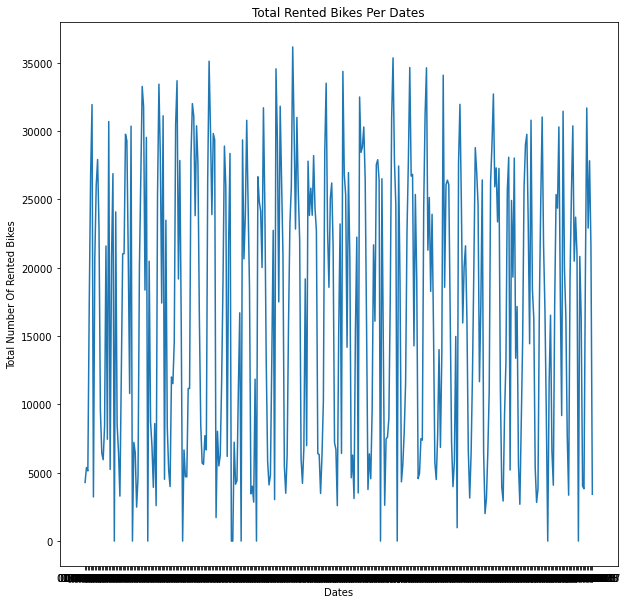

In [ ]:
plt.figure(figsize = (10,10))
# df.groupby('Date')['Rented Bike Count'].sum().reset_index().plot( kind = 'line')
df_1 = df.groupby('Date')['Rented Bike Count'].sum().reset_index()
plt.plot(df_1['Date'] ,df_1['Rented Bike Count'])
plt.xlabel('Dates')
plt.ylabel('Total Number Of Rented Bikes')
plt.title('Total Rented Bikes Per Dates')
plt.show()

In [ ]:
df_1.sort_values(by = 'Rented Bike Count' , ascending = False).iloc[0:20]

,Date,Rented Bike Count
149,13/06/2018,36149
221,19/06/2018,35349
89,08/06/2018,35103
233,20/06/2018,34639
245,21/06/2018,34621
137,12/06/2018,34544
185,16/06/2018,34360
257,22/06/2018,34079
66,06/07/2018,33676
173,15/06/2018,33492


In [ ]:
isinstance(df['Date'][0],str)      ## checking whether date is str object or date object

True

In [ ]:
# df_2 = df_1.groupby('Day')['Rented Bike Count'].sum().reset_index()
# df_2.sort_values(by= 'Rented Bike Count',ascending =False)

Hourly booking count plot

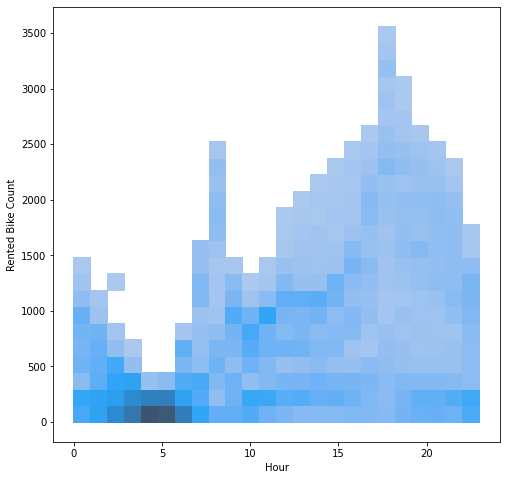

In [ ]:
plt.figure(figsize = (8,8))
sns.histplot(data = df , x = 'Hour' , y = 'Rented Bike Count' , bins = 24 , kde=True)

plt.show()

Observation:
* At 8th, 18th and 19th hour rentals are maximum
* From 10th to 18th hour rentals are continuusly increasing and then decreases from 18 to 23

Seasonwise renting count

In [ ]:
df_season = df.groupby(by = 'Seasons')['Rented Bike Count'].sum().reset_index()
df_season

,Seasons,Rented Bike Count
0,Autumn,1790002
1,Spring,1611909
2,Summer,2283234
3,Winter,487169


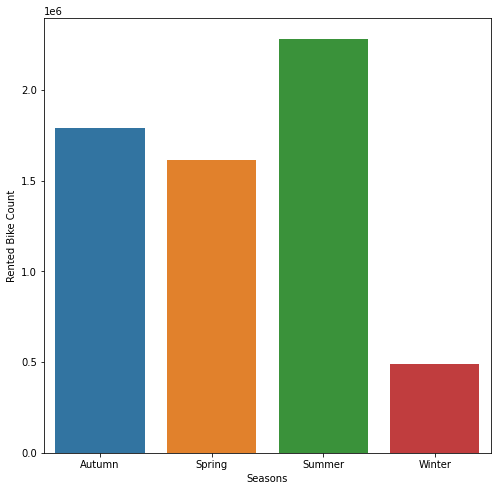

In [ ]:
plt.figure(figsize = (8,8))
sns.barplot(data = df_season , x = 'Seasons' , y = 'Rented Bike Count')

plt.show()

Observation:
* 37 percent of total rentals have taken place in summer
* minimum 8% of rentals have taken place in winter

Holiday renting count

In [ ]:
df_holiday = df.groupby(by = 'Holiday')['Rented Bike Count'].sum().reset_index()
df_holiday

,Holiday,Rented Bike Count
0,Holiday,215895
1,No Holiday,5956419


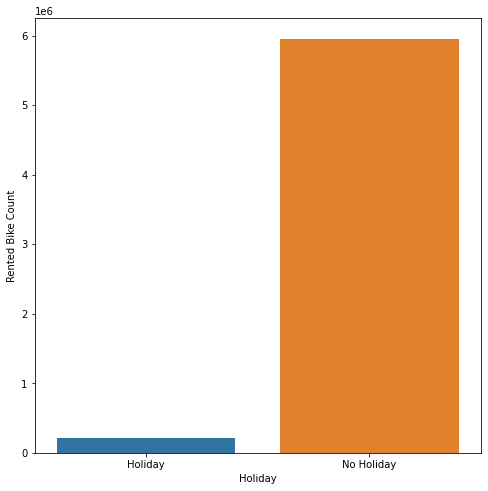

In [ ]:
plt.figure(figsize = (8,8))
sns.barplot(data = df_holiday , x = 'Holiday' , y = 'Rented Bike Count')

plt.show()

Observation:
* 97% of rentals have  took place on No holiday

Functioning hour rented count

In [ ]:
df_functioning = df.groupby(by = 'Functioning Day')['Rented Bike Count'].sum().reset_index()
df_functioning

,Functioning Day,Rented Bike Count
0,No,0
1,Yes,6172314


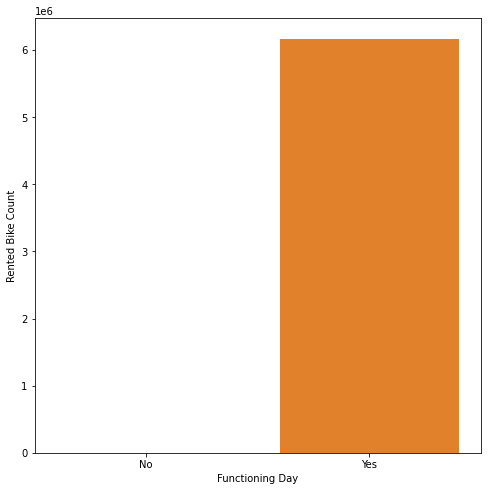

In [ ]:
plt.figure(figsize = (8,8))
sns.barplot(data = df_functioning , x = 'Functioning Day' , y = 'Rented Bike Count' )

plt.show()

Observation:
* 100 percent of the rentals have took place on functioning day(hours

In [ ]:
# adding a column day of the month in our original data set

df['Day'] = df['Date'].apply(lambda x: datetime.datetime.strptime(x , '%d/%m/%Y').weekday())

In [ ]:
day = ['Monday' , 'Tuesday' , 'Wednesday' , 'Thursday' , 'Friday' , 'Saturday' , 'Sunday']
df['day_of_week'] = df['Day'].apply(lambda x: day[x])

In [ ]:
df_5 = df.groupby(by = 'day_of_week')['Rented Bike Count'].sum().reset_index().sort_values(by = 'Rented Bike Count' , ascending = False)
df_5.head(5)

,day_of_week,Rented Bike Count
0,Friday,950334
6,Wednesday,923956
1,Monday,911743
2,Saturday,885492
4,Thursday,861999


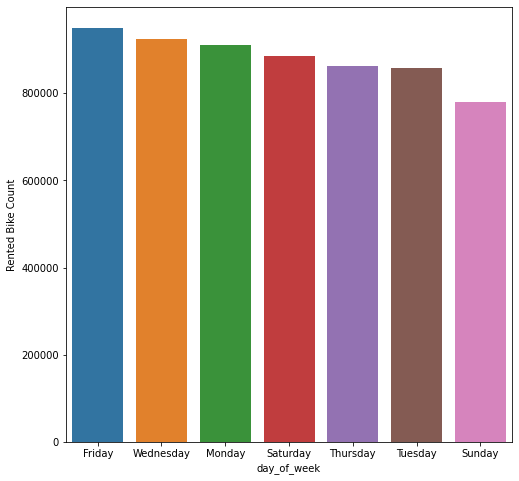

In [ ]:
plt.figure(figsize = (8,8))

sns.barplot(x = df_5['day_of_week'] , y = df_5['Rented Bike Count'])

plt.show()

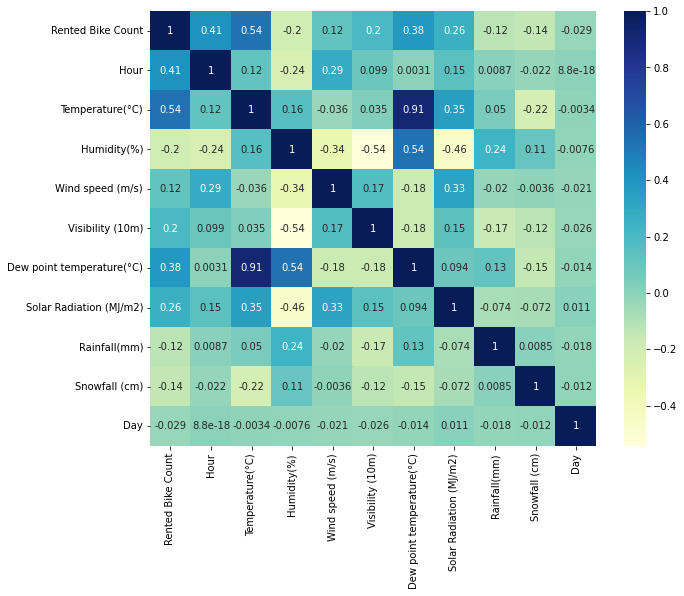

In [ ]:
plt.figure(figsize = (10,8))

corr_matrix = df.corr()
sns.heatmap(corr_matrix , annot = True, cmap = 'YlGnBu')

plt.show()

Observation:
* Bike Counts increases as Temperature increases.
* Bike Count is also proportional to Hour to a little extent
* bike count increases as Dew Point temperature increases
* bike count is also proportional to visibility,wind speed and solar radiation but very weak proportionality.
*Bike count also decreases as snowfall,rainfall and humidity increases with a very weak inverse propportionality
* Bike count is not at all dependent on the day of week

Feature Engineering

In [ ]:
df['Day'] = df['Date'].apply(lambda x: datetime.datetime.strptime(x, '%d/%m/%Y').weekday())   ## adding date , month ,year columns 
df['Year'] = df['Date'].apply(lambda x: datetime.datetime.strptime(x, '%d/%m/%Y').year)
df['Month'] = df['Date'].apply(lambda x: datetime.datetime.strptime(x, '%d/%m/%Y').month)
df['Date_1'] = df['Date'].apply(lambda x: datetime.datetime.strptime(x, '%d/%m/%Y').day)

In [ ]:
df_6 = df.groupby(by = 'Month')['Rented Bike Count'].sum().reset_index().sort_values(by = 'Rented Bike Count' , ascending = False)    ### groupping by month

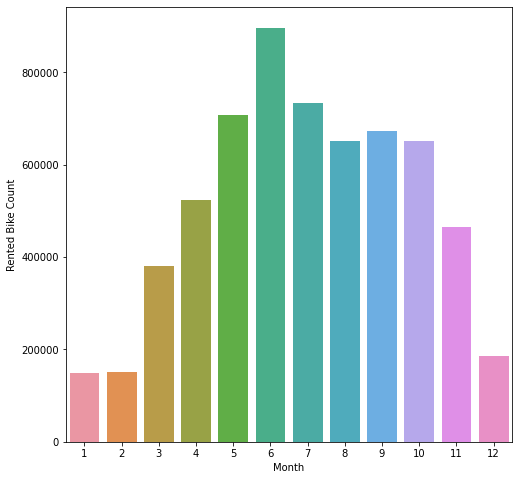

In [ ]:
plt.figure(figsize = (8,8))

sns.barplot(x = df_6['Month'] , y = df_6['Rented Bike Count'])

plt.show()

Observation
* In month of june rented bike count is maximum
* In month of january and february the rented boike count is minimum

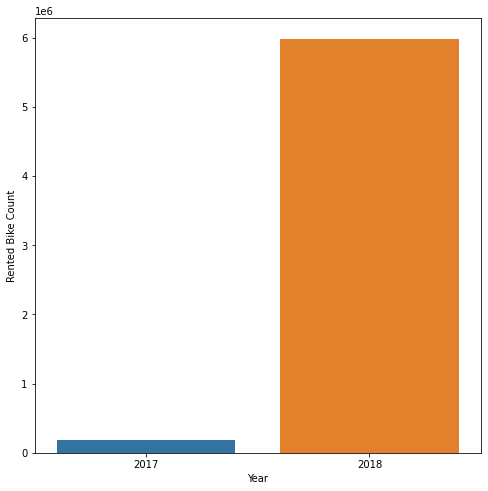

In [ ]:
df_7 = df.groupby(by = 'Year')['Rented Bike Count'].sum().reset_index().sort_values(by = 'Rented Bike Count' , ascending = False)    ### groupping by year
plt.figure(figsize = (8,8))

sns.barplot(x = df_7['Year'] , y = df_7['Rented Bike Count'])

plt.show()

In [ ]:
df.head(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,day_of_week,Year,Month,Date_1
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,4,Friday,2017,12,1
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,4,Friday,2017,12,1
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,4,Friday,2017,12,1
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,4,Friday,2017,12,1
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,4,Friday,2017,12,1


In [ ]:
df.drop(['Date' , 'day_of_week'] , inplace = True , axis = 1)

Converting categorical features to numerical via one hot encoding

In [ ]:
different_seasons = pd.get_dummies(df['Seasons'])             ## one hot encoding seasons
different_seasons.head(5)                  

,Autumn,Spring,Summer,Winter
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [ ]:
df = pd.merge(df,different_seasons , how = 'left' , left_index = True , right_index = True)       ### merging with df

In [ ]:
different_holiday = pd.get_dummies(df['Holiday'])                     ## one hot encoding holiday and merging with df
df = pd.merge(df,different_holiday , how = 'left' , left_index = True , right_index = True)
df.head(5)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),...,Day,Year,Month,Date_1,Autumn,Spring,Summer,Winter,Holiday_y,No Holiday
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,...,4,2017,12,1,0,0,0,1,0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,...,4,2017,12,1,0,0,0,1,0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,...,4,2017,12,1,0,0,0,1,0,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,...,4,2017,12,1,0,0,0,1,0,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,...,4,2017,12,1,0,0,0,1,0,1


In [ ]:
different_Functioning_Day = pd.get_dummies(df['Functioning Day'])          ## one hot encoding Functioning day and merging with df
df = pd.merge(df,different_Functioning_Day , how = 'left' , left_index = True , right_index = True)
df.head(5)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),...,Month,Date_1,Autumn,Spring,Summer,Winter,Holiday_y,No Holiday,No,Yes
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,...,12,1,0,0,0,1,0,1,0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,...,12,1,0,0,0,1,0,1,0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,...,12,1,0,0,0,1,0,1,0,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,...,12,1,0,0,0,1,0,1,0,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,...,12,1,0,0,0,1,0,1,0,1


In [ ]:
df_final = df.drop(['Seasons' , 'Holiday_x' ,'Functioning Day' ] , axis = 1)

In [ ]:
df_final.head(5)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),...,Month,Date_1,Autumn,Spring,Summer,Winter,Holiday_y,No Holiday,No,Yes
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,...,12,1,0,0,0,1,0,1,0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,...,12,1,0,0,0,1,0,1,0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,...,12,1,0,0,0,1,0,1,0,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,...,12,1,0,0,0,1,0,1,0,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,...,12,1,0,0,0,1,0,1,0,1


Dropping the duplicate values, if any

In [ ]:
df_final.drop_duplicates(keep = 'first' , inplace = True)

column standardisation

In [ ]:
list1 = ['Hour', 'Temperature(°C)', 'Humidity(%)','Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Day',
       'Year', 'Month', 'Date_1', 'Autumn', 'Spring', 'Summer', 'Winter',
       'Holiday_y', 'No Holiday', 'No', 'Yes']

In [ ]:


for column in list1:
  df_final[column] = df_final[column].apply(lambda x :( (x-df_final[column].mean())/(df_final[column].max()-df_final[column].min())))


In [ ]:
df_final.head(5)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Day,Year,Month,Date_1,Autumn,Spring,Summer,Winter,Holiday_y,No Holiday,No,Yes
0,254,-0.500000,-0.316135,-0.216594,0.064202,0.285441,-0.374979,-0.161679,-0.004248,-0.008531,0.16621,-0.915068,0.497634,-0.490685,-0.249315,-0.252055,-0.252055,0.753425,-0.049315,0.049315,-0.033676,0.033676
1,204,-0.456522,-0.321380,-0.206390,-0.124988,0.285441,-0.374979,-0.161679,-0.004248,-0.008531,0.16621,-0.915068,0.497634,-0.490685,-0.249315,-0.252055,-0.252055,0.753425,-0.049315,0.049315,-0.033676,0.033676
2,173,-0.413043,-0.330121,-0.196186,-0.097961,0.285441,-0.376710,-0.161679,-0.004248,-0.008531,0.16621,-0.915068,0.497634,-0.490685,-0.249315,-0.252055,-0.252055,0.753425,-0.049315,0.049315,-0.033676,0.033676
3,107,-0.369565,-0.333618,-0.185982,-0.111474,0.285441,-0.374979,-0.161679,-0.004248,-0.008531,0.16621,-0.915068,0.497634,-0.490685,-0.249315,-0.252055,-0.252055,0.753425,-0.049315,0.049315,-0.033676,0.033676
4,78,-0.326087,-0.330121,-0.226799,0.077715,0.285441,-0.392280,-0.161679,-0.004248,-0.008531,0.16621,-0.915068,0.497634,-0.490685,-0.249315,-0.252055,-0.252055,0.753425,-0.049315,0.049315,-0.033676,0.033676


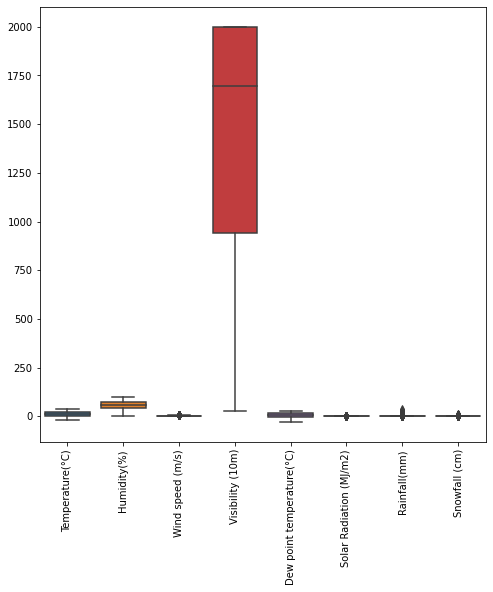

In [ ]:
columns = ['Temperature(°C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)','Dew point temperature(°C)' , 'Solar Radiation (MJ/m2)' , 'Rainfall(mm)' , 'Snowfall (cm)']

plt.figure(figsize = (8,8))
sns.boxplot(data = df_final[columns])

plt.xticks(rotation  = 90)
plt.show()

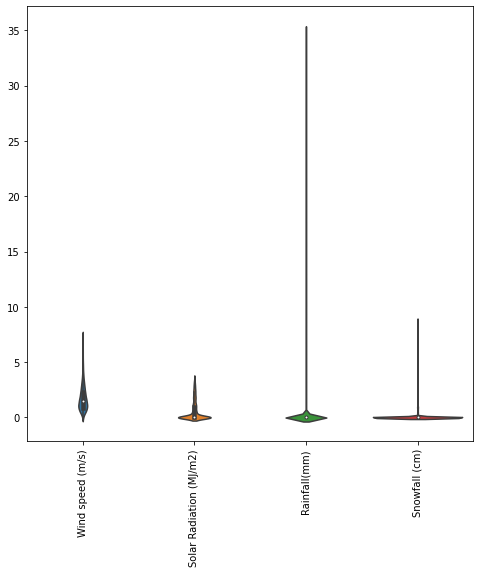

In [ ]:
columns = ['Wind speed (m/s)' , 'Solar Radiation (MJ/m2)' , 'Rainfall(mm)' , 'Snowfall (cm)']

plt.figure(figsize = (8,8))
sns.violinplot(data = df_final[columns])

plt.xticks(rotation  = 90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


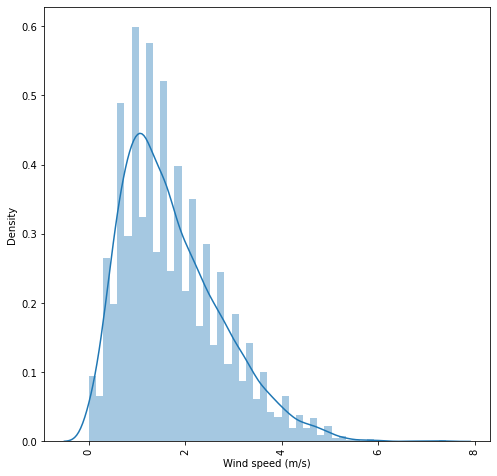

In [ ]:

plt.figure(figsize = (8,8))
sns.distplot(df_final['Wind speed (m/s)'])
plt.xticks(rotation  = 90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


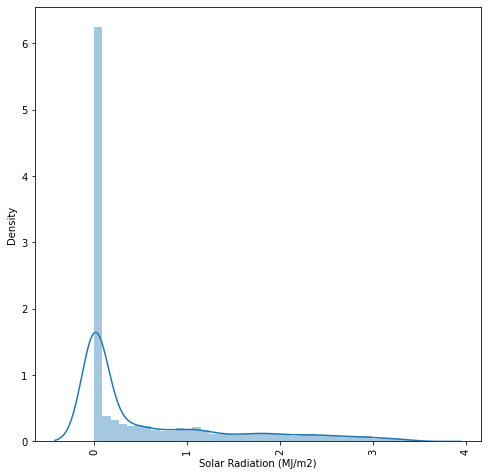

In [ ]:
plt.figure(figsize = (8,8))
sns.distplot(df_final['Solar Radiation (MJ/m2)'])
plt.xticks(rotation  = 90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


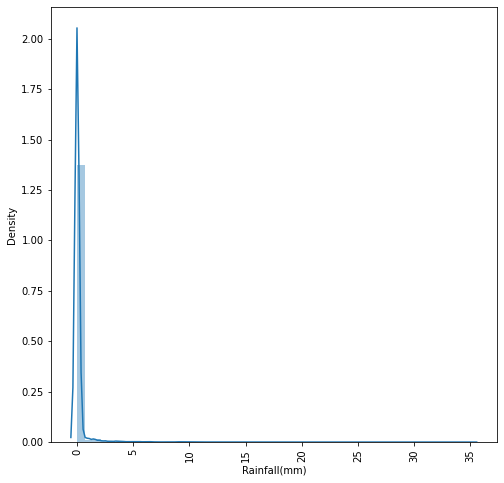

In [ ]:
plt.figure(figsize = (8,8))
sns.distplot(df_final['Rainfall(mm)'])
plt.xticks(rotation  = 90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


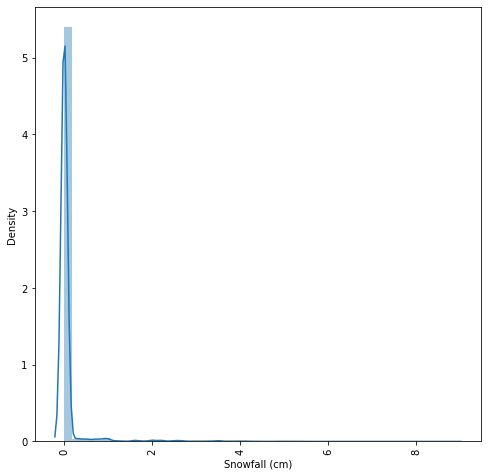

In [ ]:
plt.figure(figsize = (8,8))
sns.distplot(df_final['Snowfall (cm)'])
plt.xticks(rotation  = 90)
plt.show()

In [ ]:
columns = ['Wind speed (m/s)' , 'Solar Radiation (MJ/m2)' , 'Rainfall(mm)' , 'Snowfall (cm)']

df_final[columns].describe()

,Wind speed (m/s),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000
mean,1.724909,0.569111,0.148687,0.075068
std,1.036300,0.868746,1.128193,0.436746
min,0.000000,0.000000,0.000000,0.000000
25%,0.900000,0.000000,0.000000,0.000000
50%,1.500000,0.010000,0.000000,0.000000
75%,2.300000,0.930000,0.000000,0.000000
max,7.400000,3.520000,35.000000,8.800000


Observation-
* columns Wind speed, Solar Radiation ,Rainfall , Snowfall are positively skewed 
* These columns have a huge gap between 75th percentile and max values



Removing outliers

In [ ]:
for colmn in columns:
  Q3 = df_final[colmn].quantile(0.75)
  Q1 = df_final[colmn].quantile(0.25)
  IQR = Q3-Q1
  df_final = df_final[(df_final[colmn]>= Q1-IQR) & (df_final[colmn]<= Q3+IQR)]

In [ ]:
df_final.shape

(6292, 22)

KNN NEIGHBOURHOOD

In [ ]:
x , y = df_final[list1] , df_final['Rented Bike Count']

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size = 0.25 , random_state = 42)

In [ ]:
model = KNeighborsRegressor()
n_params = {'n_neighbors' : np.arange(1,100,2) , 'weights' : ['uniform' , 'distance']}

cv = GridSearchCV(model , param_grid = n_params , cv = 5)

In [ ]:
cv.fit(x,y)


GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99]),
                         'weights': ['uniform', 'distance']})

In [ ]:
print(cv.best_params_)
print(cv.best_score_)

{'n_neighbors': 9, 'weights': 'distance'}
-0.4770822288754049


In [ ]:
regressor = KNeighborsRegressor(n_neighbors = 9 , weights = 'distance')
regressor.fit(x_train , y_train)
predicted_y = regressor.predict(x_test)
error = mean_squared_error(predicted_y , y_test ,squared = False)
print("for k = 9 the mean_squared_log_error is {}".format(error))


for k = 9 the mean_squared_log_error is 462.5154299084966


In [ ]:
corr_matrix = np.corrcoef(y_test,predicted_y)
corr = corr_matrix[0,1]
r_sq = corr**2
print("For k = 9 and uniform distance maxtrix r_sq is {} ".format(r_sq))

For k = 9 and uniform distance maxtrix r_sq is 0.5435530516637557 


In [ ]:
error1 = mean_squared_log_error(predicted_y , y_test)
print(error1)

1.944514263062802


22222

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4719, 21)
(1573, 21)
(4719,)
(1573,)


In [ ]:
k_regressor = KNeighborsRegressor()
s = k_regressor.fit(x_train , y_train)
predicted_y = s.predict(x_test)
accuracy = mean_squared_error(predicted_y , y_test , squared = False)
print(accuracy)

473.0297044954245


In [ ]:
corr_matrix = np.corrcoef(y_test,predicted_y)
corr = corr_matrix[0,1]
r_sq = corr**2
print("For k = 9 and uniform distance maxtrix r_sq is {} ".format(r_sq))

For k = 9 and uniform distance maxtrix r_sq is 0.5258007368132085 


In [ ]:
rmsle = mean_squared_log_error(predicted_y , y_test)
print(rmsle)

1.9399629525529543
